In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_data=pd.read_csv("train.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#****************************************PREPROCESSING TRAINING DATA**************************************
# preprocessing Gender
train_data['Gender'].fillna('Male', inplace=True)

# preprocessing Gender
#train_data['Gender'].fillna('No_Gender', inplace=True)

#preprocessing Dependents using mode
train_data['Dependents'].fillna(str('0'), inplace=True)

#preprocessing Self_Employed
train_data['Self_Employed'].fillna(train_data.loc[:,"Self_Employed"].mode()[0], inplace=True)

#preprocessing LoanAmount
train_data['LoanAmount'].fillna(method='bfill', inplace=True)

#preprocessing Loan_Amount_Term
train_data['Loan_Amount_Term'].fillna(method='bfill', inplace=True)

#preprocessing Credit_history
train_data['Credit_History'].fillna(train_data.loc[:,"Credit_History"].mode()[0], inplace=True)

#preprocessing Married?
train_data=train_data.dropna(axis = 0, how ='any')#droping rows where married status is not available
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].apply(np.int64)
train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].apply(np.int64)
train_data['LoanAmount'] = train_data['LoanAmount'].apply(np.int64)

# Label Encoding
le=LabelEncoder()
train_data['Married']= le.fit_transform(train_data['Married'].astype('str'))
train_data['Gender']= le.fit_transform(train_data['Gender'].astype('str'))
train_data['Dependents']= le.fit_transform(train_data['Dependents'].astype('str'))
train_data['Education']= le.fit_transform(train_data['Education'].astype('str'))
train_data['Self_Employed']= le.fit_transform(train_data['Self_Employed'].astype('str'))
train_data['Loan_Status']= le.fit_transform(train_data['Loan_Status'].astype('str'))
train_data['Credit_History']= le.fit_transform(train_data['Credit_History'].astype('str'))
train_data=train_data.drop('Loan_ID',axis=1)

#One Hot Encoding for Propert_Area
prop_area = pd.get_dummies(train_data.Property_Area, prefix='PA_',drop_first=True)
train_data=pd.concat([train_data,prop_area],axis=1)
train_data=train_data.drop('Property_Area',axis=1)

In [7]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
PA__Semiurban        0
PA__Urban            0
dtype: int64

In [8]:
#rescaling feature
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
train_data[["scaledApp_inc","scaledCoapp_inc","scaled_loam_amt"]] = min_max_scaler.fit_transform(train_data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]])                                                                          
np.set_printoptions(precision=3)


In [9]:
train_data = train_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
train_data

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,PA__Semiurban,PA__Urban,scaledApp_inc,scaledCoapp_inc,scaled_loam_amt
0,1,0,0,0,0,360,1,1,0,1,0.070489,0.000000,0.172214
1,1,1,1,0,0,360,1,0,0,0,0.054830,0.036192,0.172214
2,1,1,0,0,1,360,1,1,0,1,0.035250,0.000000,0.082489
3,1,1,0,1,0,360,1,1,0,1,0.030093,0.056592,0.160637
4,1,0,0,0,0,360,1,1,0,1,0.072356,0.000000,0.191027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360,1,1,0,0,0.034014,0.000000,0.089725
610,1,1,3,0,0,180,1,1,0,0,0.048930,0.000000,0.044863
611,1,1,1,0,0,360,1,1,0,1,0.097984,0.005760,0.353111
612,1,1,2,0,0,360,1,1,0,1,0.091936,0.000000,0.257598


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'PA__Semiurban',
       'PA__Urban', 'scaledApp_inc', 'scaledCoapp_inc', 'scaled_loam_amt'],
      dtype='object')


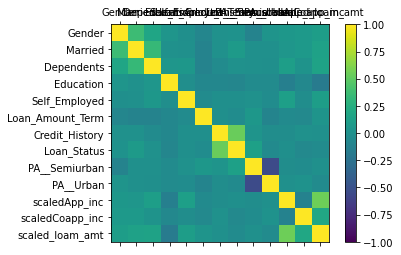

In [10]:
import matplotlib.pyplot as plt
import pandas
import numpy
names = train_data.columns
print(names)
names=list(names)
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [11]:
train_data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Loan_Status         0
PA__Semiurban       0
PA__Urban           0
scaledApp_inc       0
scaledCoapp_inc     0
scaled_loam_amt     0
dtype: int64

In [12]:
y = train_data['Loan_Status']
X= train_data.drop('Loan_Status',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(407, 12)
(204, 12)
(407,)
(204,)


In [15]:
GBClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
GBClassifier.score(X_test,y_test)

0.803921568627451

In [16]:
RFClassifier = RandomForestClassifier(n_estimators=50, random_state=1).fit(X_train,y_train)
RFClassifier.score(X_test,y_test)

0.7843137254901961

In [17]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3).fit(X, y)
KNNClassifier.score(X_test,y_test)

0.8480392156862745

In [18]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [19]:
classifier = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred))
print("Classification Report :\n ",classification_report(y_test,y_pred))

Accuracy :  0.6666666666666666
Confusion Matrix : [[  0  68]
 [  0 136]]
Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.67      1.00      0.80       136

    accuracy                           0.67       204
   macro avg       0.33      0.50      0.40       204
weighted avg       0.44      0.67      0.53       204



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
test_data=pd.read_csv("C:test.csv")

In [23]:
#****************************************PREPROCESSING TEST DATA**************************************
# preprocessing Gender
test_data['Gender'].fillna('Male', inplace=True)

#preprocessing Dependents using mode
test_data['Dependents'].fillna(str('0'), inplace=True)

#preprocessing Self_Employed
test_data['Self_Employed'].fillna(test_data.loc[:,"Self_Employed"].mode()[0], inplace=True)

#preprocessing LoanAmount
test_data['LoanAmount'].fillna(method='bfill', inplace=True)

#preprocessing Loan_Amount_Term
test_data['Loan_Amount_Term'].fillna(method='bfill', inplace=True)

#preprocessing Credit_history
test_data['Credit_History'].fillna(test_data.loc[:,"Credit_History"].mode()[0], inplace=True)

#preprocessing Married?
test_data=test_data.dropna(axis = 0, how ='any')
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].apply(np.int64)
test_data['CoapplicantIncome'] = test_data['CoapplicantIncome'].apply(np.int64)
test_data['LoanAmount'] = test_data['LoanAmount'].apply(np.int64)

# Label Encoding
le=LabelEncoder()
test_data['Married']= le.fit_transform(test_data['Married'].astype('str'))
test_data['Gender']= le.fit_transform(test_data['Gender'].astype('str'))
test_data['Dependents']= le.fit_transform(test_data['Dependents'].astype('str'))
test_data['Education']= le.fit_transform(test_data['Education'].astype('str'))
test_data['Self_Employed']= le.fit_transform(test_data['Self_Employed'].astype('str'))
test_data['Credit_History']= le.fit_transform(test_data['Credit_History'].astype('str'))
test_data=test_data.drop('Loan_ID',axis=1)

#One Hot Encoding for Propert_Area
prop_area = pd.get_dummies(test_data.Property_Area, prefix='PA_',drop_first=True)
test_data=pd.concat([test_data,prop_area],axis=1)
test_data=test_data.drop('Property_Area',axis=1)

In [24]:
#rescaling feature
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
test_data[["scaledApp_inc","scaledCoapp_inc","scaled_loam_amt"]] = min_max_scaler.fit_transform(test_data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]])                                                                          
np.set_printoptions(precision=3)

test_data = test_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
test_data


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,PA__Semiurban,PA__Urban,scaledApp_inc,scaledCoapp_inc,scaled_loam_amt
0,1,1,0,0,0,360,1,0,1,0.078865,0.000000,0.157088
1,1,1,1,0,0,360,1,0,1,0.042411,0.062500,0.187739
2,1,1,2,0,0,360,1,0,1,0.068938,0.075000,0.344828
3,1,1,2,0,0,360,1,0,1,0.032263,0.106083,0.137931
4,1,0,0,1,0,360,1,0,1,0.045168,0.000000,0.095785
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,360,1,0,1,0.055274,0.074042,0.162835
363,1,1,0,0,0,360,1,0,1,0.057329,0.029542,0.166667
364,1,0,0,0,0,360,1,1,0,0.044810,0.083042,0.187739
365,1,1,0,0,0,360,1,0,0,0.068938,0.099708,0.249042


In [25]:
test_data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
PA__Semiurban       0
PA__Urban           0
scaledApp_inc       0
scaledCoapp_inc     0
scaled_loam_amt     0
dtype: int64

In [26]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Test_Pred = pca.fit_transform(test_data)
explained_variance = pca.explained_variance_ratio_

In [27]:
Test_Prediction = classifier.predict(X_test)

In [28]:
Test_Prediction


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])